# Статистический анализ данных

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
* Без подписки

    * абонентская плата отсутствует
    * стоимость одной минуты поездки — 8 рублей
    * стоимость старта (начала поездки) — 50 рублей
    
* С подпиской ultra

    * абонентская плата — 199 рублей в месяц
    * стоимость одной минуты поездки — 6 рублей
    * стоимость старта — бесплатно
    


**Описание данных:**
* В основных данных есть информация о пользователях, их поездках и подписках.
    * Пользователи — users_go.csv
        * user_id - уникальный идентификатор пользователя
        * name - имя пользователя
        * age - возраст
        * city - город
        * subscription_type - тип подписки (free, ultra)
    * Поездки — rides_go.csv
        * user_id - уникальный идентификатор пользователя
        * distance - расстояние, которое пользователь проехал в текущей сессии (в метрах)
        * duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
        * date - дата совершения поездки
    * Подписки — subscriptions_go.csv
        * subscription_type - тип подписки
        * minute_price - стоимость одной минуты поездки по данной подписке
        * start_ride_price - стоимость начала поездки
        * subscription_fee - стоимость ежемесячного платежа

**Цель исследования** - проанализировать данны и проверить гипотезы, которые помогут бизнесу вырасти.

**План исследования**
* Изучить данные
* Выполнить предобработку данных
* Провести исследовательский анализ данных
    * Описать и визуализировать общую информацию о пользователях и поездках:
        * частота встречаемости городов
        * соотношение пользователей с подпиской и без подписки
        * возраст пользователей
        * расстояние, которое пользователь преодолел за одну поездку
        * продолжительность поездок
* Объединить данные
    * Объединить данные о пользователях, поездках и подписках в один датафрейм
    * Создать ещё два датафрейма:
        * c данными о пользователях без подписки
        * с данными о пользователях с подпиской
    * Визуализировать информацию о расстоянии и времени поездок для пользователей обеих категорий
* Подсчёт выручки
* Проверка гипотез
* Сделать общий вывод

Импортируем нужные библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt,factorial
from scipy import stats as st

## Загрузка данных

In [2]:
users = pd.read_csv('/datasets/users_go.csv')
rides = pd.read_csv('/datasets/rides_go.csv')
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

Изучим общую информацию и выведем первые строки каждого датафрейма

**Датафрейм users**

In [3]:
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
users.info()
users.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


(1565, 5)

**Датафрейм rides**

In [5]:
rides.head(50)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [6]:
rides.info()
rides.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


(18068, 4)

**Датафрейм subscriptions**

In [7]:
subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [8]:
subscriptions.info()
subscriptions.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


(2, 4)

Из полученных данных получаем:
* Таблица users состоит из 1565 строк и 5 столбцов,и включает в себя столбцы: user_id, name, age, city, subscription_type.
* Таблица rides состоит из 18068 строк и 4 столбцов, и включает в себя столбцы user_id, distance, duration, date.
* Таблица subscriptions состоит из 2 строк и 4 столбцов, и включает в себя столбцы subscription_type, minute_price, start_ride_price, subscription_fee.


## Предобработка данных

### Поменяем тип данных для столбца date в таблице rides

In [9]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')

### В таблицу rides добавим новый столбец, в котором будет хранится информация о номере месяца.

In [10]:
rides['month'] = rides['date'].dt.month

### Проверим последовательно все датафреймы на наличие пропусков и дубликатов, а после обработаем их

In [11]:
def check_dataframe(df, df_name):
    print(f'Датафрейм {df_name}')
    print((df.isna().mean() * 100).sort_values(ascending=False))
    print('Количество явных дубликатов:', df.duplicated().sum())
    print()


check_dataframe(users, 'users')
check_dataframe(rides, 'rides')
check_dataframe(subscriptions, 'subscriptions')

Датафрейм users
user_id              0.0
name                 0.0
age                  0.0
city                 0.0
subscription_type    0.0
dtype: float64
Количество явных дубликатов: 31

Датафрейм rides
user_id     0.0
distance    0.0
duration    0.0
date        0.0
month       0.0
dtype: float64
Количество явных дубликатов: 0

Датафрейм subscriptions
subscription_type    0.0
minute_price         0.0
start_ride_price     0.0
subscription_fee     0.0
dtype: float64
Количество явных дубликатов: 0



Во всех 3 датафреймах отсутствуют пропуски, есть пропуски в датафрейме users, обработаем их

In [12]:
users = users.drop_duplicates()
print('Количество явных дубликатов в столбце users после обработки',users.duplicated().sum())

Количество явных дубликатов в столбце users после обработки 0


**Вывод:**
* Изменили тип столбца date в датафрейме rides
* Добавили новый столбец month в датафрейм rides, показывающий месяц
* Явные дубликаты присутствовали в датафрейме users и были удалены
* Пропуски во всех датафреймах отсутствуют


## Исследовательский анализ данных

### Частота встречаемости городов

In [13]:
data_user_city = users.pivot_table(index='city',values='user_id',aggfunc = 'count')
data_user_city = data_user_city.sort_values(by='user_id',ascending=True)
data_user_city

,user_id
city,
Москва,168
Тюмень,180
Омск,183
Сочи,189
Краснодар,193
Ростов-на-Дону,198
Екатеринбург,204
Пятигорск,219


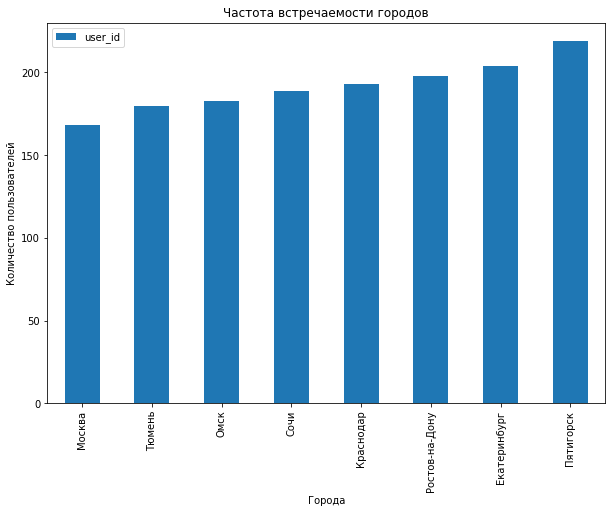

In [14]:
data_user_city.plot(kind='bar',figsize=(10,7))
plt.title('Частота встречаемости городов')
plt.ylabel('Количество пользователей')
plt.xlabel('Города')
plt.show()

**Вывод:**
* Больше всего пользователей из Пятигорска, а меньше всего из Москвы
* Всего в датафрейме есть информация о 8 городах 

### Соотношение пользователей с подпиской и без подписки

In [15]:
data_user_sub = users.pivot_table(index='subscription_type',values='user_id',aggfunc='count')
data_user_sub.sort_values(by='user_id',ascending=True)

,user_id
subscription_type,
ultra,699
free,835


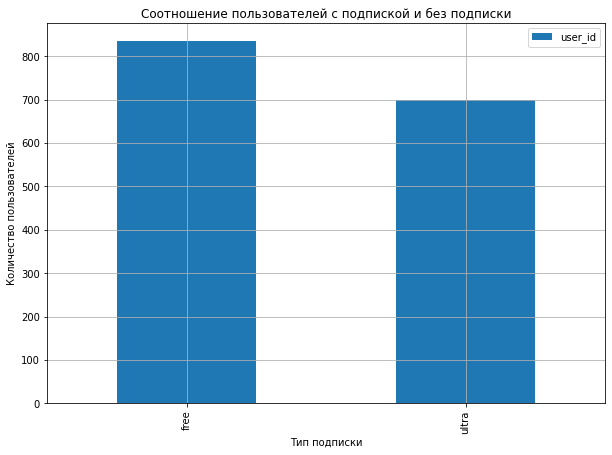

In [16]:
data_user_sub.plot(kind='bar',figsize=(10,7),grid=True)
plt.xlabel('Тип подписки')
plt.ylabel('Количество пользователей')
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.show()

**Вывод:**
* Больше всего пользователей без подписки - 835 человек, с подпиской ultra - 699 человек.

### Возраст пользователей

In [17]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

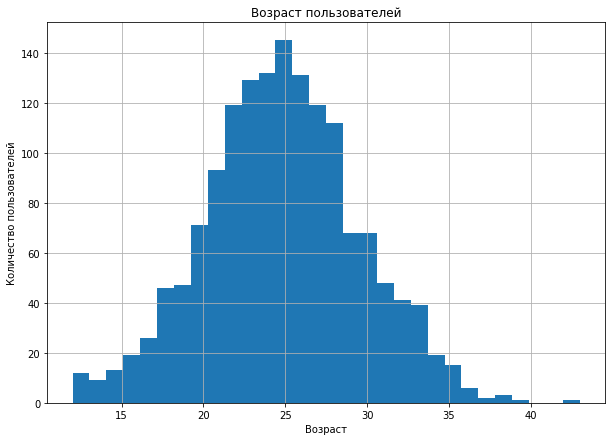

In [18]:
users['age'].plot(kind='hist',bins=30,figsize=(10,7),grid=True)
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.show()

**Вывод:**
* Средний возраст по медиане составил 24.9 лет, при этом сам график распределения по возрасту имеет нормальное распределние,так как среднее 25 близко к медиане.

### Расстояние, которое пользователь преодолел за 1 поездку

In [19]:
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

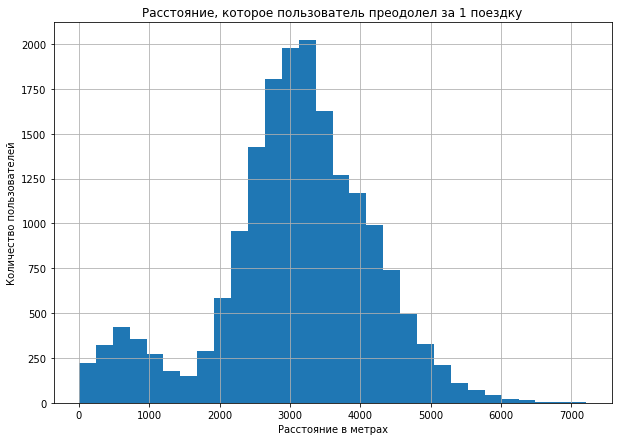

In [20]:
rides['distance'].plot(kind='hist',bins=30,figsize=(10,7),grid=True)
plt.title('Расстояние, которое пользователь преодолел за 1 поездку')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество пользователей')
plt.show()

**Вывод:**
* Среднее растояние, которое преодолевали пользователи за 1 поездку - 3070 метром, также в данных есть сплеск в значениях 500-600 метров, можем предположить,что пользователи брали в аренду самокат, чтобы доехать до станции метро или автобусной остановки.

### Продолжительность поездок

In [21]:
rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

<AxesSubplot:ylabel='Frequency'>

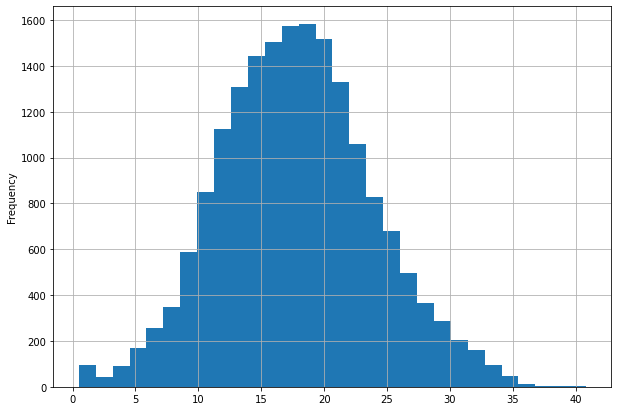

In [22]:
rides['duration'].plot(kind='hist',bins=30,figsize=(10,7),grid=True)

**Вывод:**
* Среднее время поездки составляет 17.7 минут, при этом можно заметить снова нормальное распределение данных в выборке.

**Общий вывод исследовательского анализа данных:**
* Больше всего пользователей из Пятигорска, меньше всего из Москвы
* Больше всего пользователей без подписки - 835 человек, с подпиской ultra - 699 человек
* Средний возраст пользователей 24.9 лет
* Среднее растояние, которое преодолевали пользователи за 1 поездку - 3070 метров, при этом есть выбросы на 600 метрах
* Среднее время поездки составило 17.7 минут

## Объединение данных

In [23]:
rides['distance'] = np.ceil(rides['distance'])
rides['distance'] = rides['distance'].astype('int')
rides.head()

,user_id,distance,duration,date,month
0,1,4410,25.599769,2021-01-01,1
1,1,2618,15.816871,2021-01-18,1
2,1,755,6.232113,2021-04-20,4
3,1,2695,18.511000,2021-08-11,8
4,1,4029,26.265803,2021-08-28,8


### Объединим датафреймы users, rides, subscriptions

In [24]:
merged_df = pd.merge(users, subscriptions, on='subscription_type')
merged_df = pd.merge(rides, merged_df, on='user_id')
merged_df.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4410,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2618,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,755,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2695,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4029,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


In [25]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   distance           18068 non-null  int64         
 2   duration           18068 non-null  float64       
 3   date               18068 non-null  datetime64[ns]
 4   month              18068 non-null  int64         
 5   name               18068 non-null  object        
 6   age                18068 non-null  int64         
 7   city               18068 non-null  object        
 8   subscription_type  18068 non-null  object        
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(3)
memory usage: 1.8+ MB


Объединенный датафрейм имеет 18068 строк, что соответствует изначальным датафреймам, объединение датафреймов выполнено.

### Создадим еще два датафрейма c данными о пользователях без подписки и с подпиской

Создадим датафрейм с информацией о пользователях без подписки

In [26]:
merged_df_nosub = merged_df[merged_df['subscription_type']=='free']
merged_df_nosub.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2516,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6501,700,847,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6502,700,4005,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6503,700,1206,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6504,700,3048,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0


In [27]:
print('Количество пользователей без подписки:',merged_df_nosub.shape[0])

Количество пользователей без подписки: 11568


Создадим датафрейм с информацией о пользователях с подпиской ultra

In [28]:
merged_df_sub = merged_df[merged_df['subscription_type']=='ultra']
merged_df_sub.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4410,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2618,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,755,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2695,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4029,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


In [29]:
print('Количество пользователей с подпиской ultra:',merged_df_sub.shape[0])

Количество пользователей с подпиской ultra: 6500


### Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий

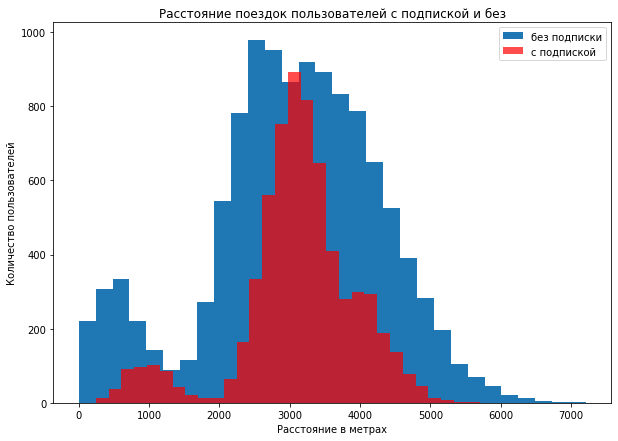

In [30]:
dist = merged_df_nosub['distance'].plot(kind='hist',figsize=(10,7),bins=30,label='без подписки')
dist = merged_df_sub['distance'].plot(kind='hist',color='red',figsize=(10,7),alpha=0.7,bins=30,label='с подпиской')
plt.title('Расстояние поездок пользователей с подпиской и без')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество пользователей')
plt.legend()
plt.show()

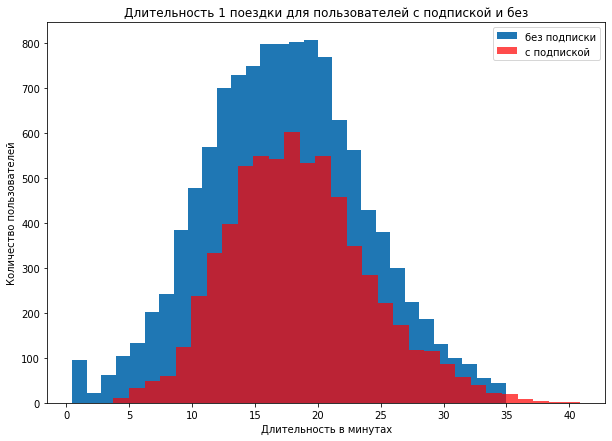

In [31]:
dur = merged_df_nosub['duration'].plot(kind='hist',figsize=(10,7),bins=30,label='без подписки')
dur = merged_df_sub['duration'].plot(kind='hist',figsize=(10,7),bins=30,label='с подпиской',color = 'red',alpha=0.7)
plt.title('Длительность 1 поездки для пользователей с подпиской и без')
plt.xlabel('Длительность в минутах')
plt.ylabel('Количество пользователей')
plt.legend()
plt.show()

**Общий вывод:**
* Объединили 3 датафрейма в один
* Создали 2 датафрейма с информацией о пользователях с подпиской и без подписки
* Выявили,что пользователей с подпиской почти в 2 раза больше,графики выше сложно сравнить пока что, из-за разницы выборки.
* Пользователи без подписки имеют более равномерное распределение как по времени, так и по расстоянию поездок. Они совершают чуть более длинные поездки
* Пользователи с подпиской склонны выбирать поездки, которые длятся немного дольше, однако их расстояние обычно короче. В этой группе также наблюдается меньшее количество поездок, которые являются короткими по расстоянию, но длительными по времени
* Пользователи без подписки, совершающие короткие по расстоянию, но длительные по времени поездки, включают новых клиентов, которые только начинают знакомиться с сервисом и учатся взаимодействовать с ним и самокатами

## Подсчёт выручки

### Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

Обозначим sum_distance - общая дистанция за месяц, count_distance - количество поездок, sum_duration - общее время поездок 

In [32]:
# округлим время поезки и изменим тип данных
merged_df['duration'] = np.ceil(merged_df['duration'])
merged_df['duration'] = merged_df['duration'].astype('int')
agg_df = merged_df.pivot_table(index= ['user_id', 'month'], values = ['distance', 'duration'], aggfunc = ['count', 'sum'])
agg_df.columns = ['_'.join(col) for col in agg_df.columns.values]#объединим уровни индекса символом "_"
agg_df = agg_df.drop(columns=['count_duration']) #уберем ненужный столбец
agg_df = agg_df.merge(users, how='left', on='user_id')#объединим с другими датафреймами
agg_df = agg_df.merge(subscriptions, how = 'left', on='subscription_type')
agg_df = agg_df.reset_index()
display(agg_df)

,index,user_id,count_distance,sum_distance,sum_duration,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,0,1,2,7028,42,Кира,22,Тюмень,ultra,6,0,199
1,1,1,1,755,7,Кира,22,Тюмень,ultra,6,0,199
2,2,1,2,6724,46,Кира,22,Тюмень,ultra,6,0,199
3,3,1,2,5811,32,Кира,22,Тюмень,ultra,6,0,199
4,4,1,3,7005,56,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
11326,11326,1534,2,3411,26,Альберт,25,Краснодар,free,8,50,0
11327,11327,1534,2,7623,48,Альберт,25,Краснодар,free,8,50,0
11328,11328,1534,1,4929,23,Альберт,25,Краснодар,free,8,50,0
11329,11329,1534,4,13353,78,Альберт,25,Краснодар,free,8,50,0


### Добавим столбец с помесячной выручкой

In [33]:
agg_df['month_earning'] = agg_df['start_ride_price']*agg_df['count_distance']+agg_df['minute_price']*agg_df['sum_duration']+agg_df['subscription_fee']

In [34]:
agg_df.head()

,index,user_id,count_distance,sum_distance,sum_duration,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,month_earning
0,0,1,2,7028,42,Кира,22,Тюмень,ultra,6,0,199,451
1,1,1,1,755,7,Кира,22,Тюмень,ultra,6,0,199,241
2,2,1,2,6724,46,Кира,22,Тюмень,ultra,6,0,199,475
3,3,1,2,5811,32,Кира,22,Тюмень,ultra,6,0,199,391
4,4,1,3,7005,56,Кира,22,Тюмень,ultra,6,0,199,535


**Вывод:**
Подсчитали выручку для каждого пользователя,которая вычисляется: Помесячная выручка считается по формуле: стоимость старта поездки × количество поездок + стоимость одной минуты поездки × общая продолжительность всех поездок в минутах + стоимость подписки.

## Проверка гипотез

### Важно понять, тратят ли пользователи с подпиской больше времени на поездки? 
Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу. Будем использовать исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

**Нулевая гипотеза:** Средняя продолжительность поездок пользоваталей с подпиской и без подписки равны

**Альтернативная гипотеза:** Средняя продолжительность поездок у пользователей с подпиской больше

In [35]:
alpha=0.05 # Зададим статистический уровень значимости
results = st.ttest_ind(merged_df_sub['duration'],merged_df_nosub['duration'],alternative='greater')
print('p-значение',results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


p-значение 1.2804098316645618e-34
Отвергаем нулевую гипотезу


Так как мы отвергаем нулевую гипотезу, можно сделать вывод, что пользователи с подпиской тратят больше времени на поездки, проверим другим способом.

In [36]:
print('Среднее время поездок пользователей с подпиской',merged_df_sub['duration'].mean())
print('Среднее время поездок пользователей без подписки',merged_df_nosub['duration'].mean())

Среднее время поездок пользователей с подпиской 18.54198516280583
Среднее время поездок пользователей без подписки 17.39090929866399


Как мы видим, среднее время поездок пользователей с подпиской и в правду больше.

***Гипотеза подтвердилась***

### Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
Расстояние одной поездки в 
3130
 метров — оптимальное с точки зрения износа самоката

**Нулевая гипотеза:** пользователи проезжают одну поездку в среднем длинною 3130 метров

**Альтернативная гипотеза:** пользователи проезжают одну поездку в среднем длинною меньше 3130 метров

In [38]:
value = 3130 
alpha = 0.05 #Зададим статистический уровень значимости
mean_dis_sub = merged_df_sub['distance'] #определим среднее расстояние поездок
results = st.ttest_1samp(mean_dis_sub,value,alternative='less')
print('p-значение',results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-значение 0.08795776629194929
Не удалось отвергнуть нулевую гипотезу


Проверим чему равно среднее расстояние поездки пользователей с подпиской

In [39]:
print('Среднее расстояние поездок пользователей с подпиской', merged_df_sub['distance'].mean())

Среднее расстояние поездок пользователей с подпиской 3115.949230769231


Среднее расстояние поездок пользователей с подпиской, действительно меньше 3130 метров

***Гипотеза подтвердилась***

### Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

**Нулевая гипотеза:** Помесячная выручка от пользователей без подписки и с подпиской равны

**Альтернативная гипотеза** Помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки.

In [40]:
alpha = 0.05 #Зададим статистический уровень значимости 
#Для удобства создадим отдельные выборки с выручкой
agg_df_ultra = agg_df[agg_df['subscription_type']== 'ultra']
agg_df_free = agg_df[agg_df['subscription_type'] == 'free']

results = st.ttest_ind(agg_df_ultra['month_earning'],agg_df_free['month_earning'],alternative='greater')
print('p-значение',results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение 1.8850394384715216e-31
Отвергаем нулевую гипотезу


Так как мы отвергаем нулевую гипотезу, можем теперь сказать, что помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки, проверим.

In [41]:
print('Средняя помесячная выручка от пользователей с подпиской',agg_df_ultra['month_earning'].mean())
print('Средняя помесячная выручка от пользователей без подписки',agg_df_free['month_earning'].mean())

Средняя помесячная выручка от пользователей с подпиской 362.7921906022502
Средняя помесячная выручка от пользователей без подписки 328.6413651073845


И в правду, даже средняя помесячная выручка от пользователей с подпиской больше, чем выручка от пользователей без подписки 

***Гипотеза подтвердилась***

### Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него.

В такой ситуации стоит применять тест о равенстве средних двух зависимых выборок. Такой тест поможет определить равенство среднего значения гениральной совокупности до и после внедрения изменений. 

В коде это будет выглядеть так: scipy.stats.ttest_rel

А аргуметами послужат выборки до и после изменений, также нужно указать, что мы проверяем левосторонюю гипотезу,поэтому аргумент alternative будет иметь значения 'less'.


**Вывод по проверке гипотез:**
* Нулевая гипотеза отвергнута - можно предполагать, что пользователи с подпиской тратят больше времени на поездки
* Нулевую гипотезу не удалось отвергнуть - можно предполагать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метро
* Нулевая гипотеза отвергнута - можно предполагать, что помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки
* В ситуации обновления сервиса, стоит использовать метод scipy.stats.ttest_rel с аргументами - выборки до и после изменения и аргументом alternative - 'less'

## Общий вывод:

* **Изучили общую информацию о данных:**
    * Таблица users состоит из 1565 строк и 5 столбцов,и включает в себя столбцы: user_id, name, age, city, subscription_type.
    * Таблица rides состоит из 18068 строк и 4 столбцов, и включает в себя столбцы user_id, distance, duration, date.
    * Таблица subscriptions состоит из 2 строк и 4 столбцов, и включает в себя столбцы subscription_type, minute_price, start_ride_price, subscription_fee.
    
* **Выполнили предобработку данных:** 
    * Изменили тип столбца date в датафрейме rides
    * Добавили новый столбец month в датафрейм rides, показывающий месяц
    * Явные дубликаты присутствовали в датафрейме users и были удалены
    * Пропуски во всех датафреймах отсутствуют
    
* **Провели исследовательский анализ данных:**
    * Больше всего пользователей из Пятигорска, меньше всего из Москвы
    * Больше всего пользователей без подписки - 835 человек, с подпиской ultra - 699 человек
    * Средний возраст пользователей 24.9 лет
    * Среднее растояние, которое преодолевали пользователи за 1 поездку - 3070 метров, при этом есть выбросы на 600 метрах
    * Среднее время поездки составило 17.7 минут
    
* **Объединили данные:**
    * Объединили 3 датафрейма в один
    * Создали 2 датафрейма с информацией о пользователях с подпиской и без подписки
    * Выявили,что пользователей с подпиской почти в 2 раза больше,графики выше сложно сравнить пока что, из-за разницы выборки.
    * Пользователи без подписки имеют более равномерное распределение как по времени, так и по расстоянию поездок. Они совершают чуть более длинные поездки
    * Пользователи с подпиской склонны выбирать поездки, которые длятся немного дольше, однако их расстояние обычно короче. В этой группе также наблюдается меньшее количество поездок, которые являются короткими по расстоянию, но длительными по времени
    * Пользователи без подписки, совершающие короткие по расстоянию, но длительные по времени поездки, включают новых клиентов, которые только начинают знакомиться с сервисом и учатся взаимодействовать с ним и самокатами

* **Подсчитали выручку:**
    * Подсчитали выручку для каждого пользователя,которая вычисляется: Помесячная выручка считается по формуле: стоимость старта поездки × количество поездок + стоимость одной минуты поездки × общая продолжительность всех поездок в минутах + стоимость подписки.
* **Проверили гипотезы:**
    * Можно предполагать, что пользователи с подпиской тратят больше времени на поездки
    * Можно предполагать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров
    * Можно предполагать, что помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки
    * В ситуации обновления сервиса, стоит использовать метод scipy.stats.ttest_rel с аргументами - выборки до и после изменения и аргументом alternative - 'less'

Подводя итоги, можно сказать, что пользователи с подпиской являются более релевантными и бизнесу GoFast, необходимо продать свои подписки большему количеству пользователей.